# **MOVIE RATING PREDICTION**

**AIM:**The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [ ]:
df = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(15509, 10)

In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,7919.0,5.841621,1.381777,1.1,4.9,6.0,6.8,10.0


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Name,15509,13838,Anjaam,7
Year,14981,102,(2019),410
Duration,7240,182,120 min,240
Genre,13632,485,Drama,2780
Votes,7920,2034,8,227
Director,14984,5938,Jayant Desai,58
Actor 1,13892,4718,Ashok Kumar,158
Actor 2,13125,4891,Rekha,83
Actor 3,12365,4820,Pran,91


In [ ]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [ ]:
df.isna().sum()


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
df.dropna(subset=['Rating'], inplace=True)


In [ ]:
df.shape

(7919, 10)

In [ ]:
df.isna().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [ ]:
df['Genre'].value_counts()


Drama                      1177
Drama, Romance              447
Action, Crime, Drama        417
Action                      417
Drama, Family               291
                           ... 
Comedy, Crime, Musical        1
History, Romance              1
Drama, History, Sport         1
Family, Drama, Thriller       1
Romance, Musical, Drama       1
Name: Genre, Length: 432, dtype: int64

In [ ]:
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)
(round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)

Duration    25.13
Name         0.00
Year         0.00
Genre        0.00
Rating       0.00
Votes        0.00
Director     0.00
Actor 1      0.00
Actor 2      0.00
Actor 3      0.00
dtype: float64

In [ ]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [ ]:
df['Duration'] = pd.to_numeric(df['Duration'].str.strip(' min'))


In [ ]:
df['Duration'].fillna(df['Duration'].mean(), inplace=True)


In [ ]:
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
df.dtypes

Name         object
Year         object
Duration    float64
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [ ]:
df['Votes'].value_counts()

7         200
9         195
8         192
6         190
10        158
         ... 
1,208       1
1,148       1
1,277       1
17,631      1
1,496       1
Name: Votes, Length: 2030, dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(7558, 10)

In [ ]:
df['Votes'] = df['Votes'].astype(str).str.replace(',', '').astype(int)


In [ ]:
# Assuming df is your DataFrame
df['Year'] = df['Year'].str.extract('(\d+)').astype(float).astype('Int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   Int64  
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int64  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: Int64(1), float64(2), int64(1), object(6)
memory usage: 656.9+ KB


In [ ]:
df['Year'].unique()

<IntegerArray>
[2019, 1997, 2005, 2012, 2014, 2004, 2016, 1991, 2018, 2010, 1958, 2021, 2017,
 2009, 1993, 2002, 1946, 2008, 1994, 2007, 2013, 2003, 1998, 1979, 1974, 2015,
 2006, 1981, 2020, 1985, 2011, 1988, 1995, 1987, 1999, 1973, 1968, 1953, 1986,
 1982, 1977, 1950, 1969, 1948, 1967, 1970, 1990, 1989, 1947, 2001, 2000, 1971,
 1978, 1944, 1963, 1992, 1976, 1984, 1975, 1980, 1966, 1972, 1956, 1960, 1964,
 1952, 1959, 1951, 1954, 1962, 1961, 1957, 1965, 1996, 1933, 1955, 1983, 1936,
 1949, 1940, 1945, 1938, 1941, 1942, 1932, 1935, 1937, 1931, 1943, 1917, 1939,
 1934]
Length: 92, dtype: Int64

In [ ]:
# Find the row with the highest number of votes
max_votes_row = df[df['Votes'] == df['Votes'].max()]

# Get the name of the movie with the highest votes
movie_highest_votes = max_votes_row['Name'].values[0]

# Find the number of votes for the movie with the highest votes
votes_highest_votes = max_votes_row['Votes'].values[0]

print("Movie with the highest votes:", movie_highest_votes)
print("Number of votes for the movie with the highest votes:", votes_highest_votes)

Movie with the highest votes: Life of Pi
Number of votes for the movie with the highest votes: 591417


In [ ]:
# Find the row with the lowest number of votes
min_votes_row = df[df['Votes'] == df['Votes'].min()]

# Get the name of the movie with the lowest votes
movie_lowest_votes = min_votes_row['Name'].values[0]

# Find the number of votes for the movie with the lowest votes
votes_lowest_votes = min_votes_row['Votes'].values[0]

print("Movie with the lowest votes:", movie_lowest_votes)
print("Number of votes for the movie with the lowest votes:", votes_lowest_votes)


Movie with the lowest votes: Aabshar
Number of votes for the movie with the lowest votes: 5


In [ ]:
# Find the row with the highest rating
max_rating_row = df[df['Rating'] == df['Rating'].max()]
movie_highest_rating = max_rating_row['Name'].values[0]
votes_highest_rating = max_rating_row['Votes'].values[0]

print("Movie with the highest rating:", movie_highest_rating)
print("Number of votes for the movie with the highest rating:", votes_highest_rating)


Movie with the highest rating: Love Qubool Hai
Number of votes for the movie with the highest rating: 5


In [ ]:
# Find the row with the lowest rating
min_rating_row = df[df['Rating'] == df['Rating'].min()]
movie_lowest_rating = min_rating_row['Name'].values[0]
votes_lowest_rating = min_rating_row['Votes'].values[0]

print("Movie with the lowest rating:", movie_lowest_rating)
print("Number of votes for the movie with the lowest rating:", votes_lowest_rating)

Movie with the lowest rating: Sadak 2
Number of votes for the movie with the lowest rating: 67785


**`DATA VISUALIZATION`**

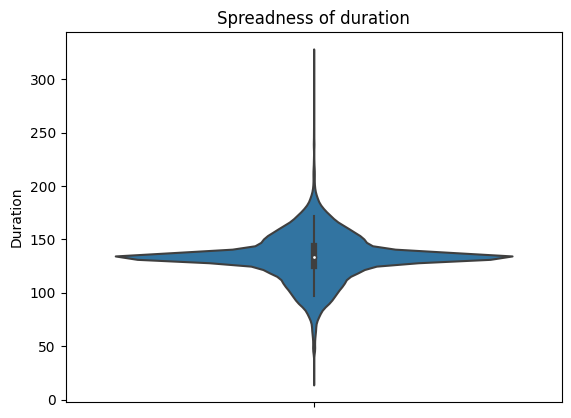

In [ ]:
sns.violinplot(y=df['Duration'])
plt.title('Spreadness of duration')
plt.show()

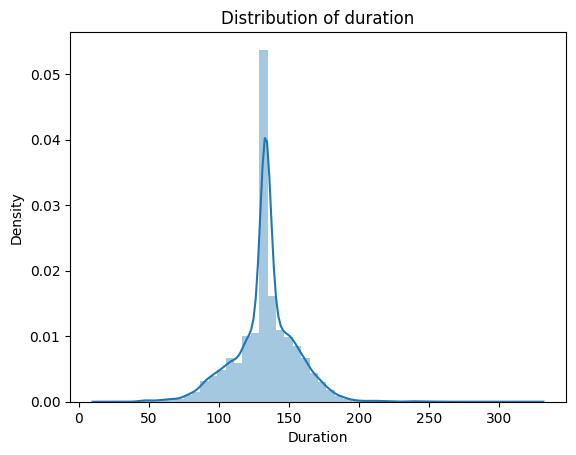

In [ ]:
sns.distplot(df['Duration'])
plt.title('Distribution of duration')
plt.show()


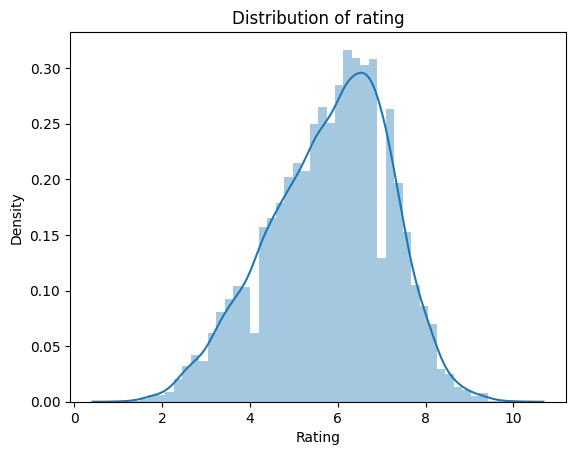

In [ ]:
sns.distplot(df['Rating'])
plt.title('Distribution of rating')
plt.show()



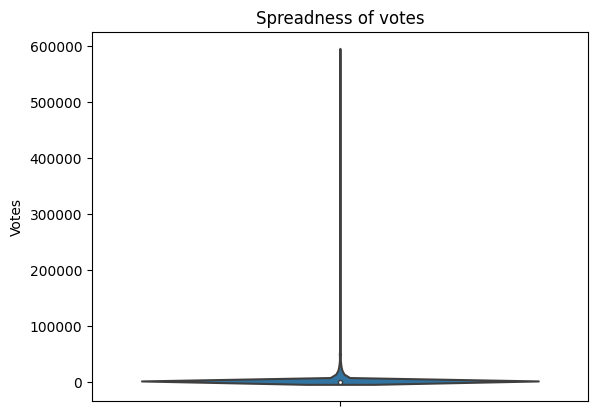

In [ ]:
sns.violinplot(y=df['Votes'])
plt.title('Spreadness of votes')
plt.show()


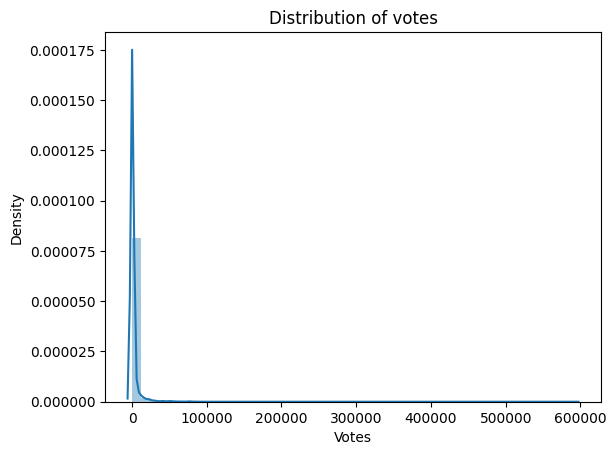

In [ ]:
sns.distplot(df['Votes'])
plt.title('Distribution of votes')
plt.show()

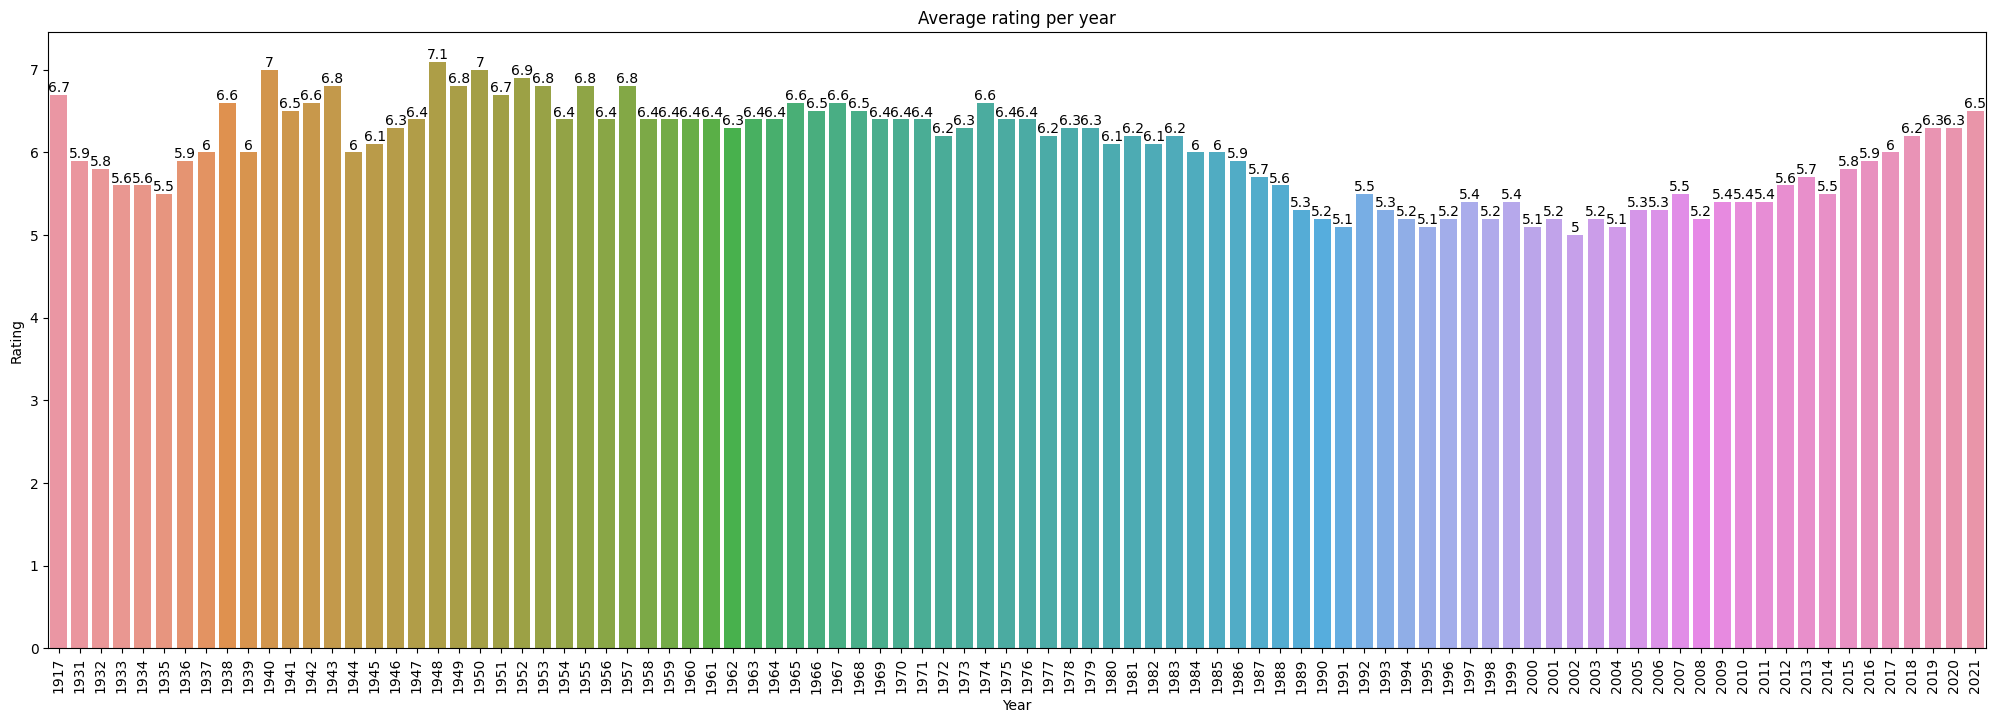

In [ ]:
# Average rating per year
year_rating = df.groupby('Year').agg({'Rating': 'mean'}).reset_index().sort_values(by='Rating',
                                                                     ascending=False,
                                                                     )
year_rating['Rating'] = round(year_rating['Rating'],1)

plt.figure(figsize=(25,8))
ax = sns.barplot(data=year_rating, x='Year', y='Rating')
ax.bar_label(ax.containers[0])
plt.title('Average rating per year')
plt.xticks(rotation=90)
plt.show()


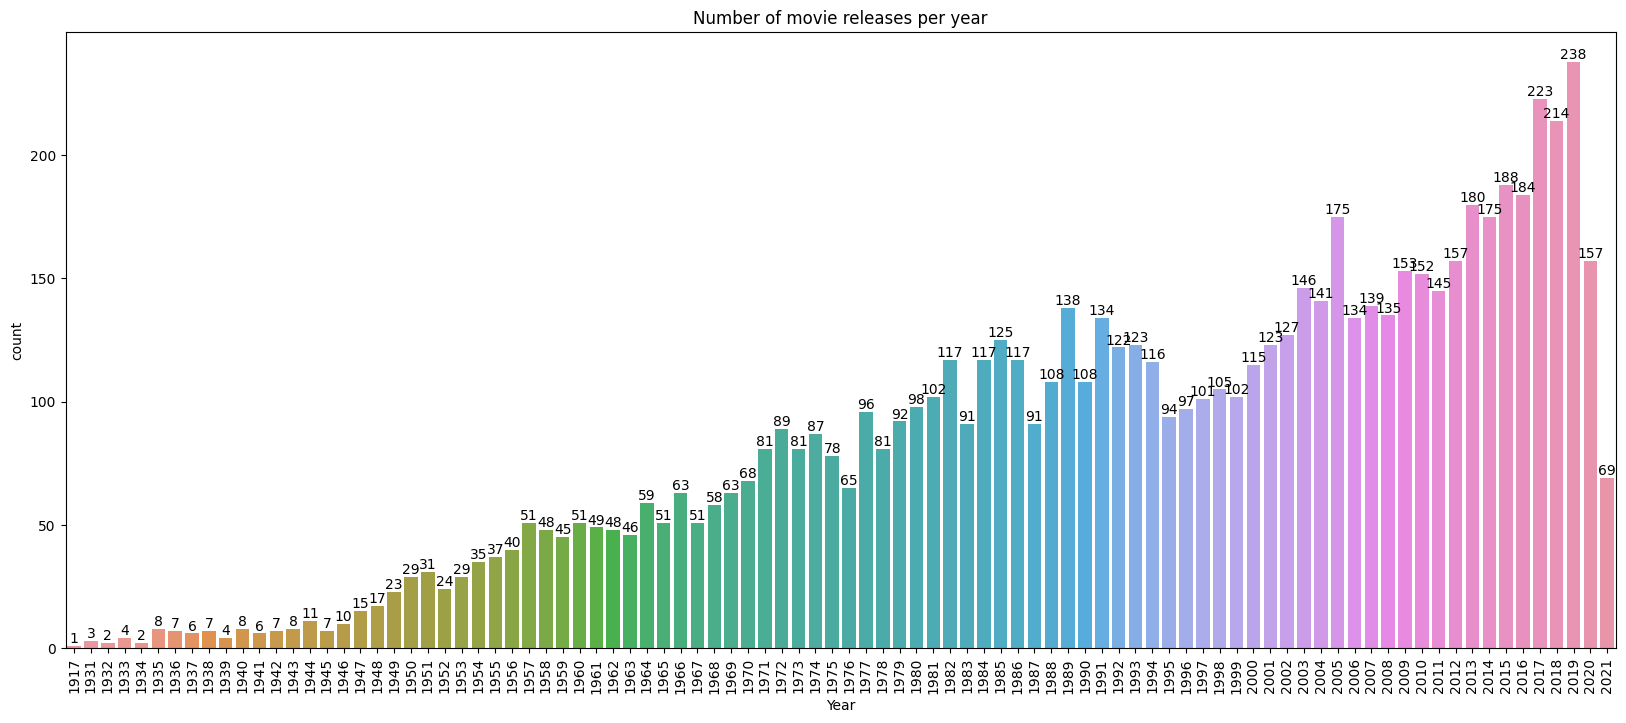

In [ ]:
# Number of movie release per year
year_count = df.groupby('Year').agg({'Name':'count'}).rename(columns={'Name':'count'}).\
                                        sort_values(by='count', ascending=False).reset_index()
plt.figure(figsize=(20,8))
ax = sns.barplot(data=year_count, x='Year', y='count')
ax.bar_label(ax.containers[0])
plt.title('Number of movie releases per year')
plt.xticks(rotation=90)
plt.show()

In [ ]:
year_avg_rating = df.groupby('Year')['Rating'].mean().reset_index()

top_5_years = year_avg_rating.nlargest(10, 'Rating')
fig = px.bar(top_5_years, x='Year', y='Rating', title='Top 10 Years by Average Rating', color = "Rating", color_continuous_scale = "darkmint")
fig.update_xaxes(type='category')
fig.update_layout(xaxis_title='Year', yaxis_title='Average Rating', plot_bgcolor = 'white')
fig.show()

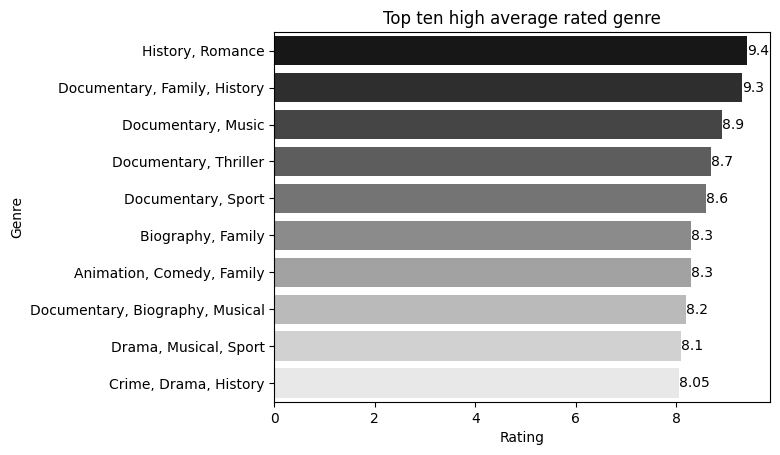

In [ ]:
# plot top ten high average rated genre
genre_rate = df.groupby('Genre').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                .reset_index().head(10)

ax = sns.barplot(data=genre_rate, x='Rating', y='Genre', palette='gist_gray')
ax.bar_label(ax.containers[0])
plt.title('Top ten high average rated genre')
plt.show()

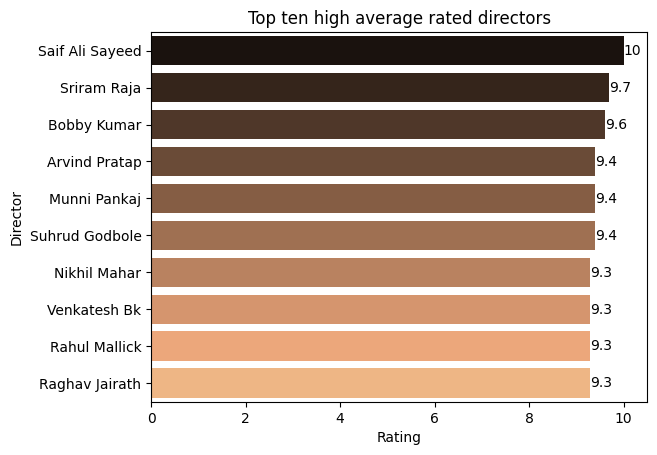

In [ ]:
# plot top ten high average rating directors
director_rate = df.groupby('Director').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                      .reset_index().head(10)

ax = sns.barplot(data=director_rate, x='Rating', y='Director', palette='copper')
ax.bar_label(ax.containers[0])
plt.title('Top ten high average rated directors')
plt.show()



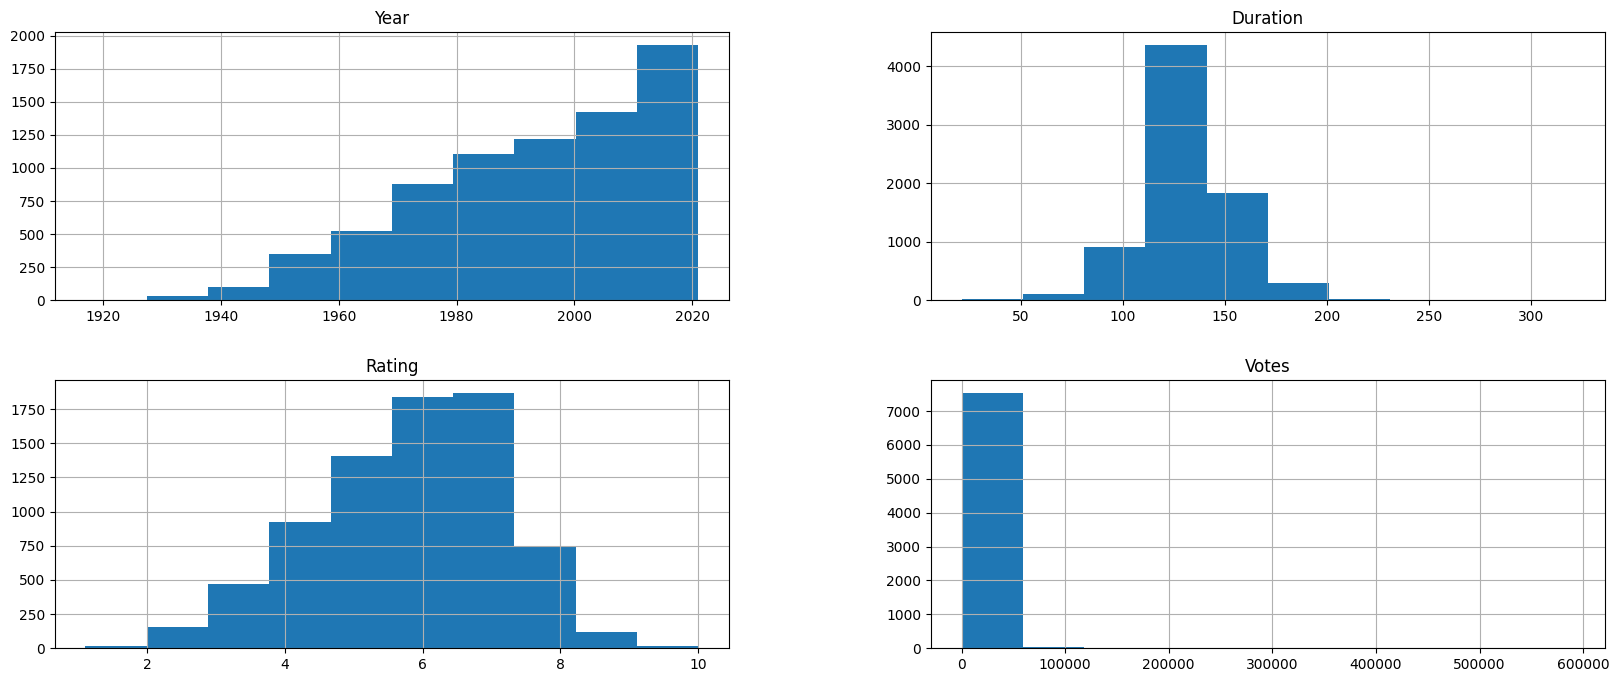

In [ ]:
df.hist(figsize=(20, 8))
None

**`REMOVING OUTLIERS`**

In [ ]:
numeric_columns=['Year','Duration','Votes']

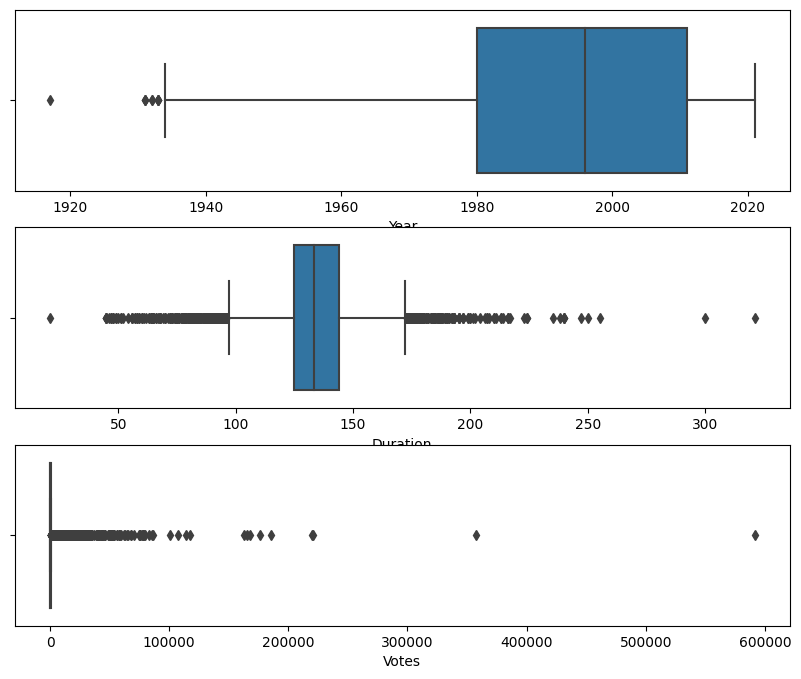

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['Year', 'Duration', 'Votes']

plt.figure(figsize=(10, 8))

for i, column in enumerate(numeric_columns):
    plt.subplot(3, 1, i+1)
    sns.boxplot(x=df[column])  # Modified this line to use x=df[column]
plt.show()


In [ ]:
#to remove outliers
def remove_outlier(df,numeric_columns):
  Q1=df[numeric_columns].quantile(0.25)
  Q3=df[numeric_columns].quantile(0.75)
  IQR=Q3-Q1
  df_out=df.loc[(df[numeric_columns]>Q1-1.5*IQR)&(df[numeric_columns]<Q3+1.5*IQR)]
  return df_out
df=remove_outlier(df,'Year')
df=remove_outlier(df,'Duration')
df=remove_outlier(df,'Votes')


**`CORRELATION`**

In [ ]:
df.corr()

,Year,Duration,Rating,Votes
Year,1.000000,-0.306309,-0.317978,0.251576
Duration,-0.306309,1.000000,0.040298,0.058160
Rating,-0.317978,0.040298,1.000000,-0.010020
Votes,0.251576,0.058160,-0.010020,1.000000


<Axes: >

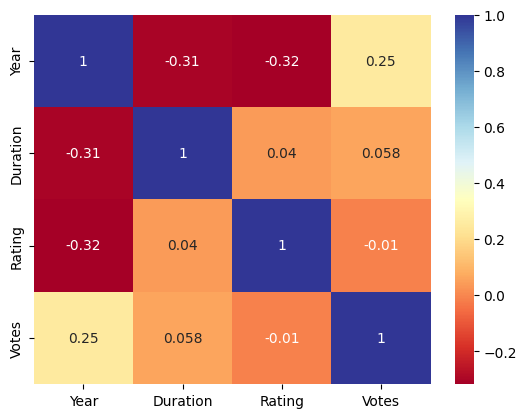

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlBu')

In [ ]:
df['Name'].value_counts()

Jawab            4
Zindagi          4
Sanjog           4
Adhikar          3
Apradhi          3
                ..
Girls' Hostel    1
Girlfriend       1
Girl Friend      1
Giraftaari       1
Zulm-O-Sitam     1
Name: Name, Length: 5269, dtype: int64

In [ ]:
# Dropping non essential columns
df.drop('Name', axis = 1, inplace = True)

# FEATURE ENGINEERING

This code is performing a process called feature engineering, where new features are created based on existing data to potentially improve the predictive power of a machine learning model.

In [ ]:
# Grouping the columns with their average rating and then creating a new feature

genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating

In [ ]:
df.dtypes

Year                   Int64
Duration             float64
Genre                 object
Rating               float64
Votes                  int64
Director              object
Actor 1               object
Actor 2               object
Actor 3               object
Genre_mean_rating    float64
Director_encoded     float64
Actor1_encoded       float64
Actor2_encoded       float64
Actor3_encoded       float64
dtype: object

In [ ]:
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.256087,7.00,7.000000,7.00,7.000000
3,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.360526,4.40,4.733333,4.40,4.450000
5,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.352174,5.44,4.200000,4.20,5.590909
9,2014,116.0,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,5.309091,4.00,4.000000,4.55,4.000000
11,2016,120.0,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,4.520408,6.95,5.780000,5.90,5.900000


In [ ]:
df

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,109.000000,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.256087,7.000000,7.000000,7.000000,7.000000
3,2019,110.000000,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.360526,4.400000,4.733333,4.400000,4.450000
5,1997,147.000000,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.352174,5.440000,4.200000,4.200000,5.590909
9,2014,116.000000,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,5.309091,4.000000,4.000000,4.550000,4.000000
11,2016,120.000000,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,4.520408,6.950000,5.780000,5.900000,5.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15501,1992,133.439124,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda,5.236749,5.560000,5.683193,6.061538,4.810000
15503,1989,125.000000,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,5.236749,5.885714,6.328571,5.800000,5.714286
15504,1988,133.439124,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,5.045187,4.075000,5.584848,3.700000,4.600000
15505,1999,129.000000,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.431915,5.050000,4.461111,4.366667,5.616129


**`X AND Y SEPERATION`**

In [ ]:
x = df[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = df['Rating']


In [ ]:
x

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,8,109.000000,6.256087,7.000000,7.000000,7.000000,7.000000
3,2019,35,110.000000,5.360526,4.400000,4.733333,4.400000,4.450000
5,1997,827,147.000000,6.352174,5.440000,4.200000,4.200000,5.590909
9,2014,11,116.000000,5.309091,4.000000,4.000000,4.550000,4.000000
11,2016,59,120.000000,4.520408,6.950000,5.780000,5.900000,5.900000
...,...,...,...,...,...,...,...,...
15501,1992,135,133.439124,5.236749,5.560000,5.683193,6.061538,4.810000
15503,1989,44,125.000000,5.236749,5.885714,6.328571,5.800000,5.714286
15504,1988,11,133.439124,5.045187,4.075000,5.584848,3.700000,4.600000
15505,1999,655,129.000000,5.431915,5.050000,4.461111,4.366667,5.616129


In [ ]:
y

1        7.0
3        4.4
5        4.7
9        4.0
11       5.9
        ... 
15501    5.3
15503    5.8
15504    4.6
15505    4.5
15508    6.2
Name: Rating, Length: 5637, dtype: float64

# **`MODEL CREATION AND EVALUATION`**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error,mean_absolute_percentage_error, r2_score


**`Splitting into training and testing`**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

**`1.MULTIPLE LINEAR REGRESSION`**

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

In [ ]:
print('The performance evaluation of Linear Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, lr_pred))
print('Mean percentage error: ',mean_absolute_percentage_error(y_test, lr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, lr_pred))
print('R2 score: ',r2_score(y_test, lr_pred))
mr2=r2_score(y_test, lr_pred)

The performance evaluation of Linear Regression is below:  

Mean squared error:  0.3772870047410745
Mean percentage error:  0.09141625441997797
Mean absolute error:  0.45973919122762597
R2 score:  0.7824667455735485


Text(0, 0.5, 'Actual Values')

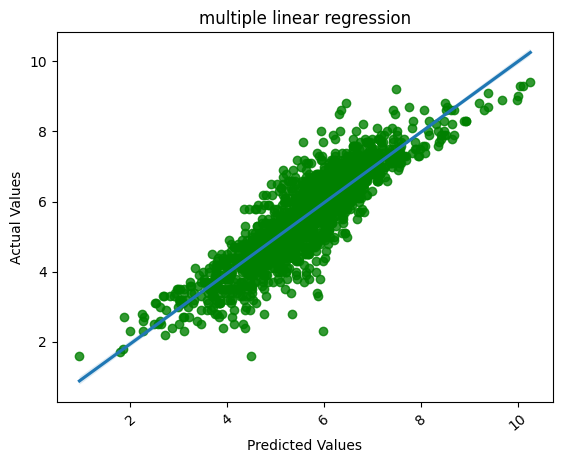

In [ ]:
# Visualizing the accuracy of our ML models
sns.regplot(x=lr_pred, y=y_test,scatter_kws={'color': 'green'})
plt.xticks(rotation=40)
plt.title( "multiple linear regression")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

**`2. RANDOM FOREST`**

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

In [ ]:
print('The performance evaluation of Random Forest Regressor is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, rf_pred))
print('Mean percentage error: ',mean_absolute_percentage_error(y_test, rf_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, rf_pred))
print('R2 score: ',r2_score(y_test, rf_pred))
rr2=r2_score(y_test, rf_pred)

The performance evaluation of Random Forest Regressor is below:  

Mean squared error:  0.3414055981087471
Mean percentage error:  0.0797945716174726
Mean absolute error:  0.4028782505910166
R2 score:  0.8031549724672516


Text(0, 0.5, 'Actual Values')

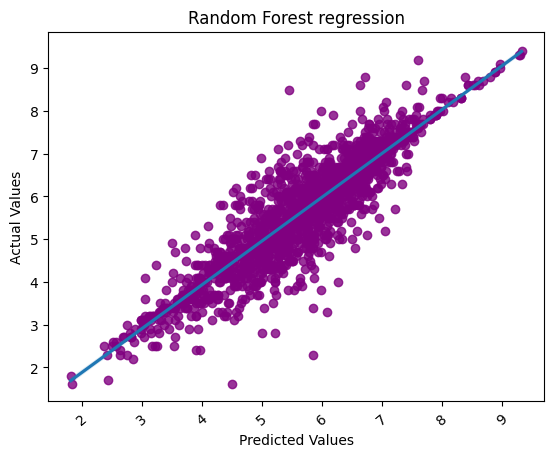

In [ ]:
# Visualizing the accuracy of our ML models
sns.regplot(x=rf_pred, y=y_test,scatter_kws={'color': 'purple'})
plt.xticks(rotation=40)
plt.title( "Random Forest regression")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

**`3.RIDGE REGRESSION`**

In [ ]:
alpha = 1.0  # You can adjust the alpha parameter for different levels of regularization
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(x_train, y_train)
ridge_pred = ridge_model.predict(x_test)


In [ ]:
print('The performance evaluation of Ridge Regressor is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, ridge_pred))
print('Mean percentage error: ',mean_absolute_percentage_error(y_test, ridge_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, ridge_pred))
print('R2 score: ',r2_score(y_test, ridge_pred))
ridr2=r2_score(y_test, ridge_pred)

The performance evaluation of Ridge Regressor is below:  

Mean squared error:  0.37728989850389677
Mean percentage error:  0.09141688990785143
Mean absolute error:  0.45973745591260945
R2 score:  0.7824650771099216


Text(0, 0.5, 'Actual Values')

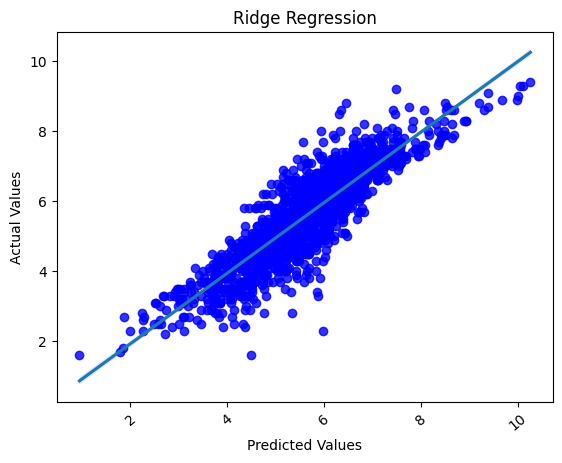

In [ ]:
# Visualizing the accuracy of our ML models
sns.regplot(x=ridge_pred, y=y_test,scatter_kws={'color': 'blue'})
plt.xticks(rotation=40)
plt.title( "Ridge Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

**`R2 SCORE OF MODELS`**

In [ ]:
model=['MULTIPLE LINEAR','RANDOM FOREST','RIDGE REGRESSION']
r2_score=[mr2,rr2,ridr2]
r2_score

[0.7824667455735485, 0.8031549724672516, 0.7824650771099216]

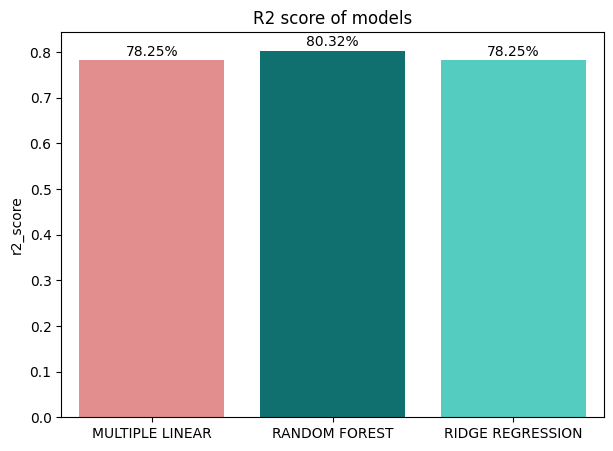

In [ ]:
color=['lightcoral','teal','turquoise']
plt.figure(figsize=(7,5))
sns.barplot(x=model,y=r2_score,palette=color)
plt.ylabel('r2_score')
plt.title('R2 score of models')
# Adding percentage labels
for i, score in enumerate(r2_score):
    plt.text(i, score +0.01, f'{score*100:.2f}%' , ha = 'center')
plt.show()

# MODEL TESTING

In [ ]:
# Assuming x is a NumPy array
x_sample = pd.DataFrame(x, columns=['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded'])
x_sample.head()


,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,8,109.0,6.256087,7.00,7.000000,7.00,7.000000
3,2019,35,110.0,5.360526,4.40,4.733333,4.40,4.450000
5,1997,827,147.0,6.352174,5.44,4.200000,4.20,5.590909
9,2014,11,116.0,5.309091,4.00,4.000000,4.55,4.000000
11,2016,59,120.0,4.520408,6.95,5.780000,5.90,5.900000


In [ ]:
y.head()

1     7.0
3     4.4
5     4.7
9     4.0
11    5.9
Name: Rating, dtype: float64

In [ ]:
# Creating a new dataframe with values close to the 5th row according to the sample above

data = {'Year': [2016], 'Votes': [58], 'Duration': [121], 'Genre_mean_rating': [4.5], 'Director_encoded': [5.8], 'Actor1_encoded': [5.9], 'Actor2_encoded': [5.9], 'Actor3_encoded': [5.900]}
df = pd.DataFrame(data)


In [ ]:

# Predict the movie rating
predicted_rating = rf.predict(df)

# Display the predicted rating
print("Predicted Rating:", predicted_rating[0])


Predicted Rating: 5.930999999999996


We took the original data from x.head() and created a new dataframe almost similar to row 5. The original rating was 5.9. Out trained random forest regressor predicted 5.93 on unseen data. Therefore, showing the robustness of model.

# **CONCLUSION:**


In this project, we explored and analyzed a dataset containing information about Indian movies from IMDb. The dataset covered various aspects such as the release year, duration, votes, genre, directors, actors, and ratings. The primary goal was to build a regression model capable of predicting movie ratings based on different features.

**Modeling:**

*   Three different regression models were trained and evaluated: Multiple Linear Regression, Random Forest Regressor, and Ridge Regression.
*   Evaluation metrics such as Mean Squared Error, Mean Absolute Percentage Error, Mean Absolute Error, and R-squared Score were used to assess the model performance.

*   Random Forest Regressor showed the best performance among the models.

**Model Testing:**

*   We tested the trained Random Forest Regressor on unseen data, creating a new DataFrame with values similar to an existing row.
*   The model predicted a movie rating close to the actual rating, demonstrating its robustness and effectiveness on unseen data.







**Conclusion:**



*   The Random Forest Regressor provides a reliable prediction of movie ratings based on features like release year, votes, duration, and encoded information about genre, director, and actors.
*  he model is capable of generalizing well to unseen data, making it a valuable tool for predicting movie ratings for new releases.

*   The project highlights the importance of feature engineering in capturing the influence of genres, directors, and actors on movie ratings.
*   The project highlights the importance of feature engineering in capturing the influence of genres, directors, and actors on movie ratings.



